,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


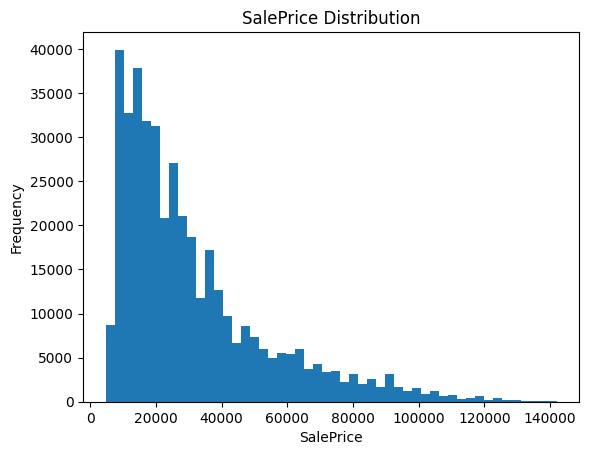

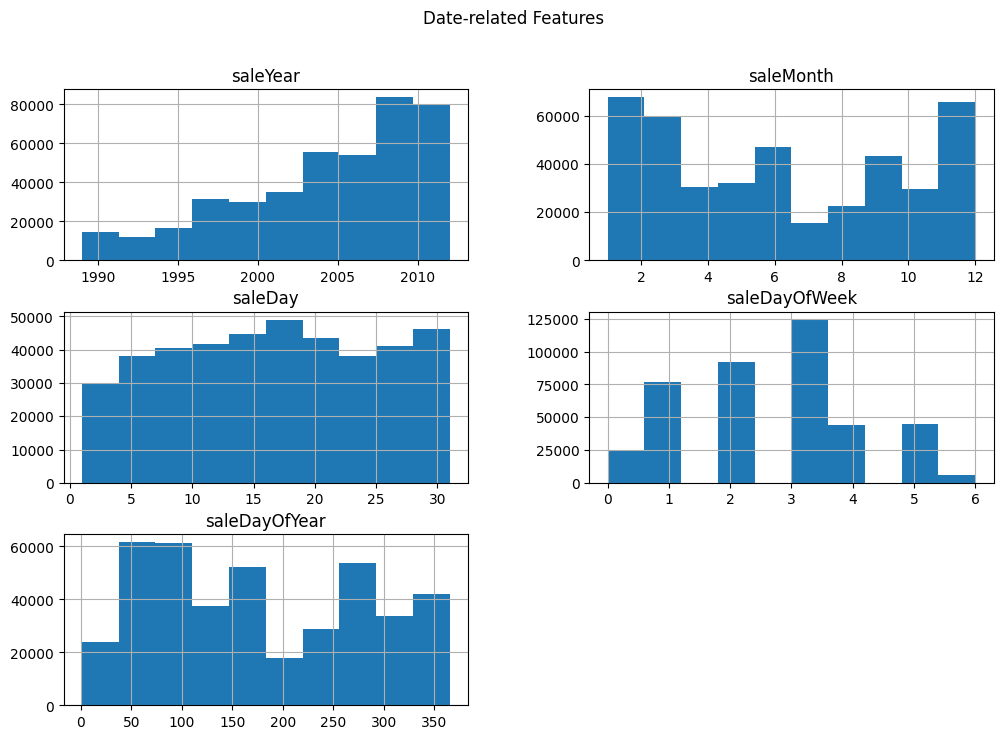

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
train_df = pd.read_csv(r"C:\Users\ainao\Downloads\Projects\Bulldozer-Prediction\Data\TrainAndValid.csv", low_memory=False)
test_df = pd.read_csv(r"C:\Users\ainao\Downloads\Projects\Bulldozer-Prediction\Data\Test.csv", low_memory=False)

# Show head
display(train_df.head())

# Define function to add date features
def add_date_features(df):
    df["saledate"] = pd.to_datetime(df["saledate"])
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayOfWeek"] = df["saledate"].dt.dayofweek
    df["saleDayOfYear"] = df["saledate"].dt.dayofyear
    return df

# Add date features
train_df = add_date_features(train_df)
test_df = add_date_features(test_df)

# Distribution of target
plt.hist(train_df["SalePrice"], bins=50)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Date-related feature distributions
date_cols = ["saleYear", "saleMonth", "saleDay", "saleDayOfWeek", "saleDayOfYear"]
train_df[date_cols].hist(figsize=(12, 8))
plt.suptitle("Date-related Features")
plt.show()


## Missing Values Analysis

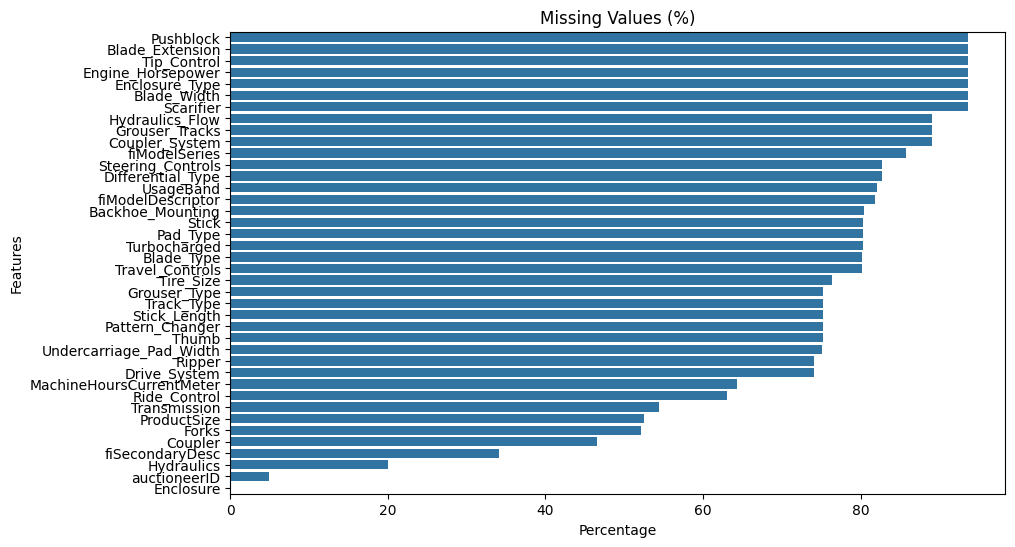

In [17]:
missing = train_df.isnull().sum() / len(train_df) * 100
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Missing Values (%)")
plt.xlabel("Percentage")
plt.ylabel("Features")
plt.show()

Distribution of SalePrice

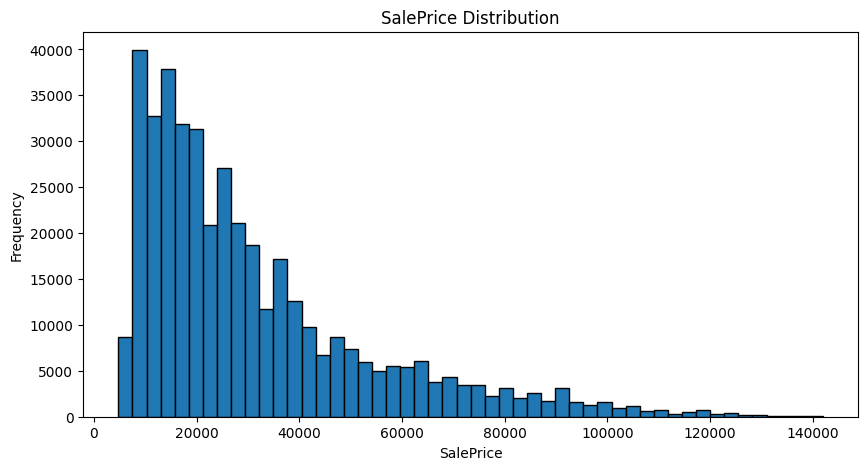

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(train_df["SalePrice"], bins=50, edgecolor='black')
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

## Log-transformed SalePrice

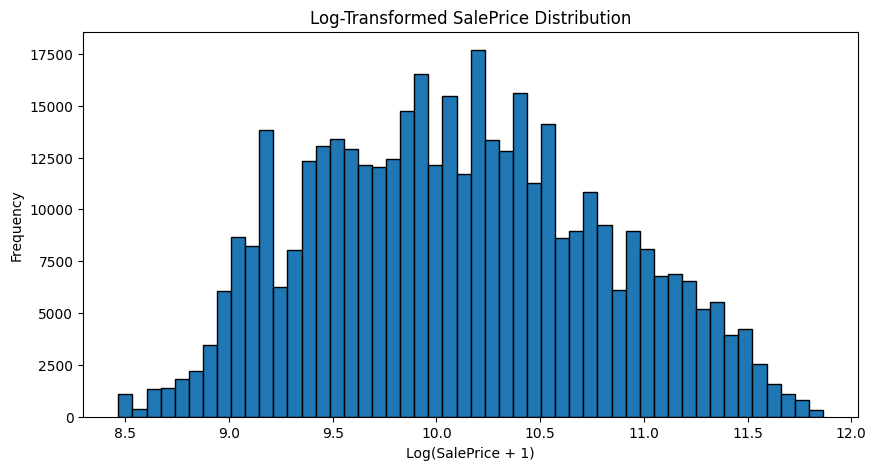

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(train_df["SalePrice"].apply(lambda x: np.log(x+1)), bins=50, edgecolor='black')
plt.title("Log-Transformed SalePrice Distribution")
plt.xlabel("Log(SalePrice + 1)")
plt.ylabel("Frequency")
plt.show()

## Temporal trend of SalePrice

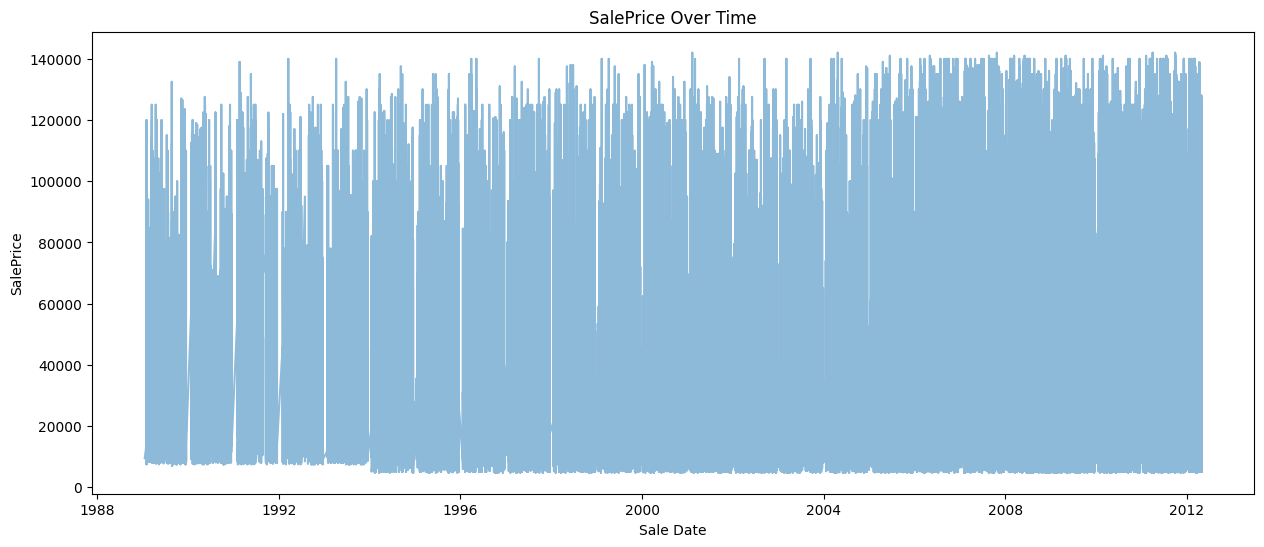

[2025-07-05 13:10:01,131: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2025-07-05 13:10:01,596: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


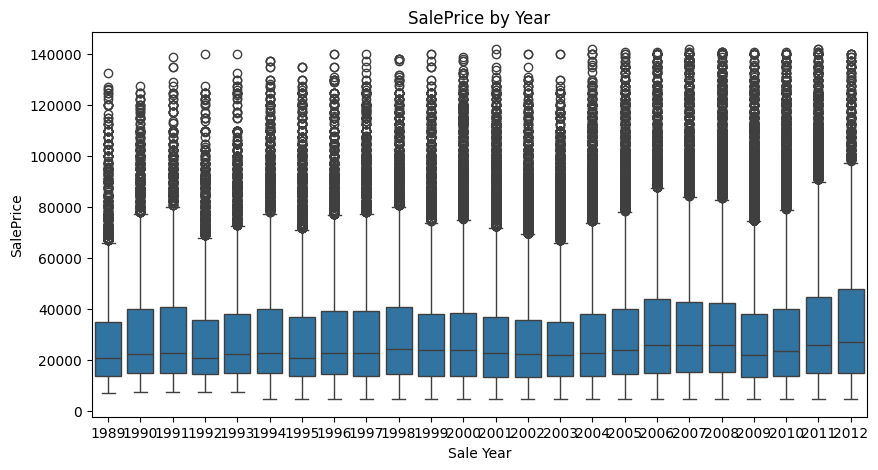

In [20]:
train_df.sort_values("saledate", inplace=True)

plt.figure(figsize=(15, 6))
plt.plot(train_df["saledate"], train_df["SalePrice"], alpha=0.5)
plt.title("SalePrice Over Time")
plt.xlabel("Sale Date")
plt.ylabel("SalePrice")
plt.show()

# Mean SalePrice per Year
plt.figure(figsize=(10, 5))
sns.boxplot(x="saleYear", y="SalePrice", data=train_df)
plt.title("SalePrice by Year")
plt.xlabel("Sale Year")
plt.ylabel("SalePrice")
plt.show()

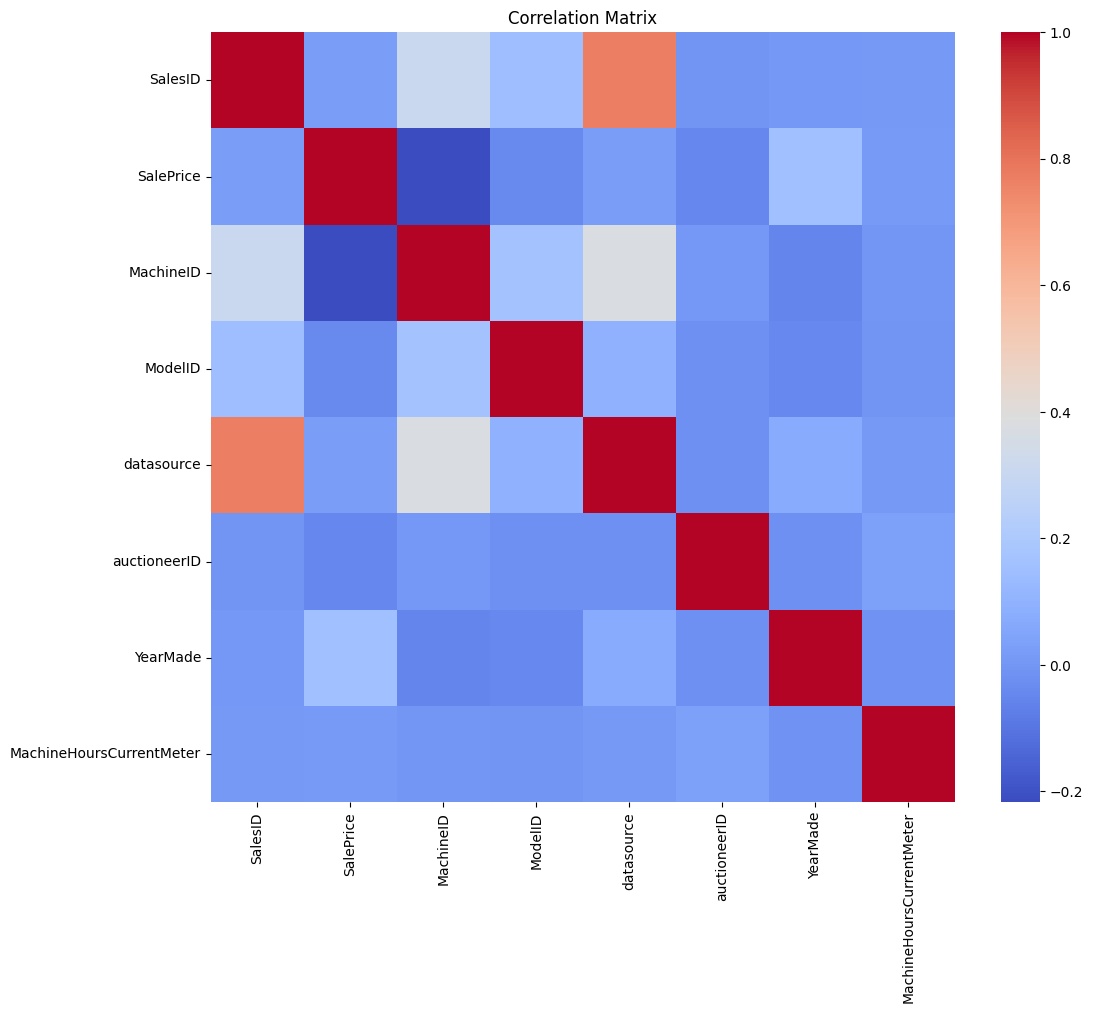

In [12]:
import seaborn as sns

numeric_cols = train_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
if "SalePrice" in numeric_cols:
    corr = train_df[numeric_cols].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, cmap="coolwarm", annot=False)
    plt.title("Correlation Matrix")
    plt.show()


# Categorical feature distributions

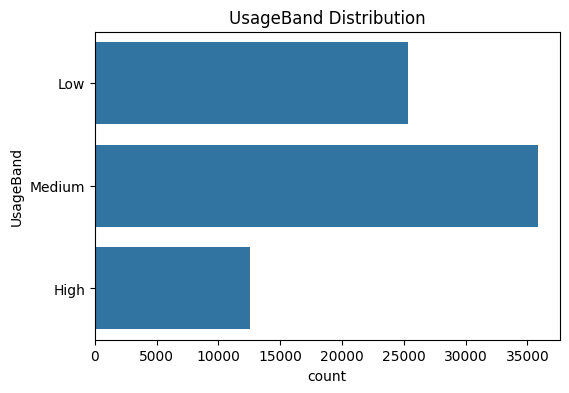

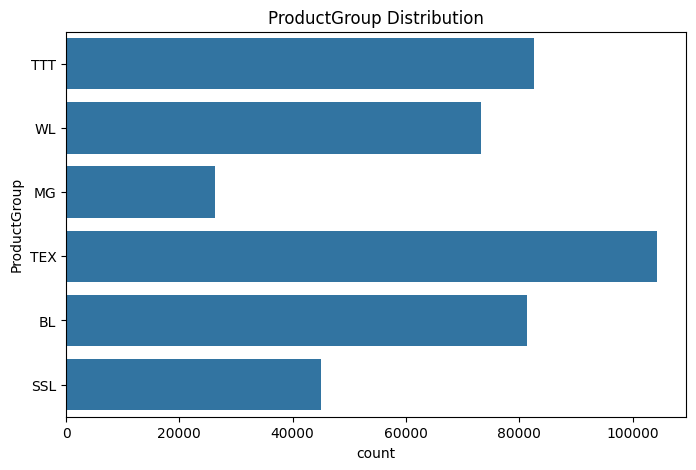

In [21]:
if "UsageBand" in train_df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(y="UsageBand", data=train_df)
    plt.title("UsageBand Distribution")
    plt.show()

if "ProductGroup" in train_df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(y="ProductGroup", data=train_df)
    plt.title("ProductGroup Distribution")
    plt.show()

# Sale counts by Year and Month

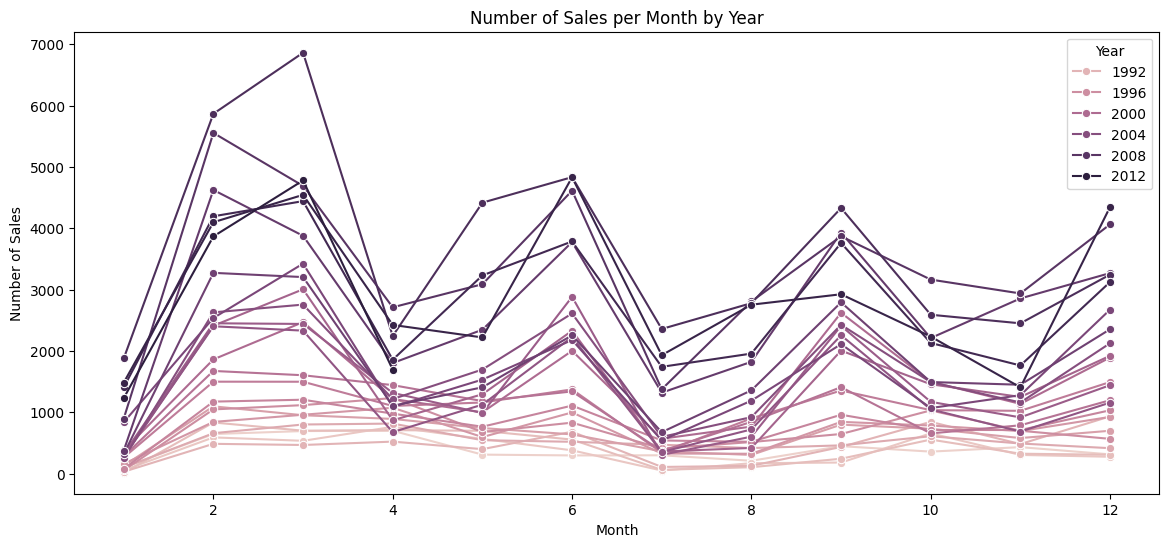

In [22]:
sale_counts = train_df.groupby(["saleYear", "saleMonth"]).size().reset_index(name="count")
plt.figure(figsize=(14, 6))
sns.lineplot(x="saleMonth", y="count", hue="saleYear", data=sale_counts, marker="o")
plt.title("Number of Sales per Month by Year")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.legend(title="Year")
plt.show()